# Introduction to Comet ML

## Import libraries

In [14]:
import pandas as pd
import plotly.express as px
import sys

sys.path.append('../../')

from comet_ml import Experiment
from DataScienceHelpers.ExploratoryDataAnalysis import display_histograms

## Set-up Comet ML

In [15]:
experiment = Experiment(
  api_key="POtvPasHuWR4enM1jereXupSx",
  project_name="medical-appointment",
  workspace="helios12"
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/helios12/medical-appointment/d33442b4bb3940a6884eeb791eec8d85



## Loading data

In [16]:
df = pd.read_csv('../../data/KaggleV2-May-2016.csv')
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


## Visualization

### Distribution of features

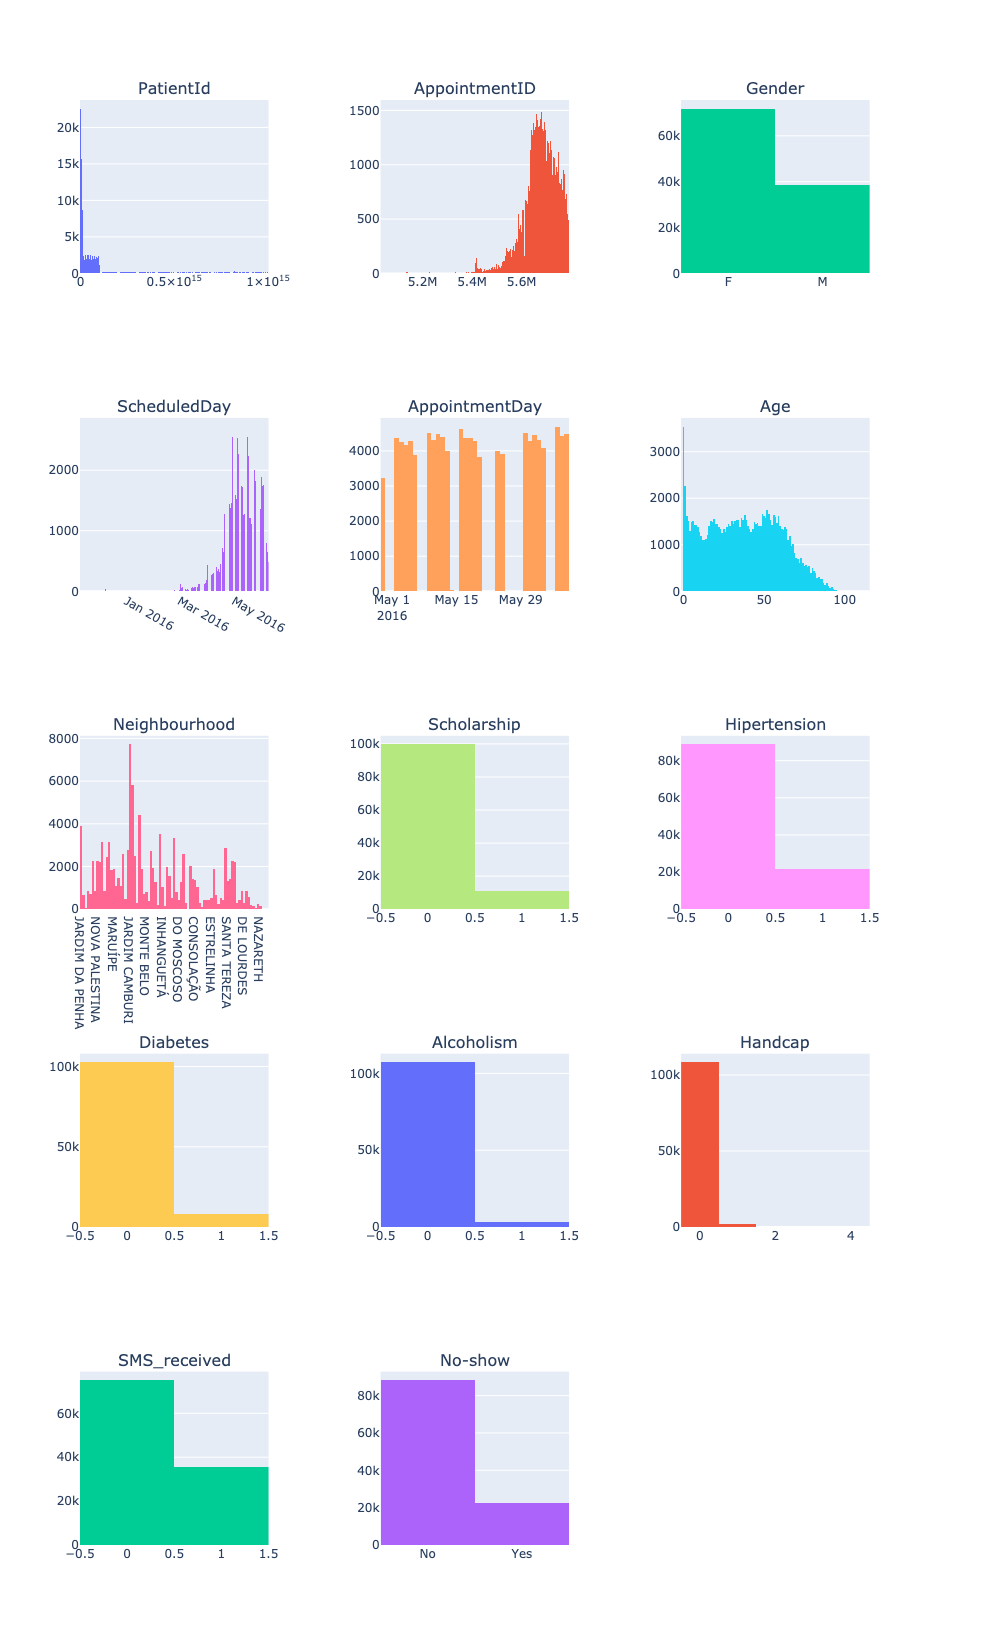

{'web': 'https://www.comet.com/api/image/download?imageId=a640c4913c684535b549b1a6630ba8c2&experimentKey=d33442b4bb3940a6884eeb791eec8d85',
 'api': 'https://www.comet.com/api/rest/v1/image/get-image?imageId=a640c4913c684535b549b1a6630ba8c2&experimentKey=d33442b4bb3940a6884eeb791eec8d85',
 'imageId': 'a640c4913c684535b549b1a6630ba8c2'}

In [17]:
fig = display_histograms(df, cols=3, row_height=325)
experiment.log_figure(figure=fig)

### Analysis of people of each age

#### Finding and deleting of outliers

In [18]:
print(f'Unique values in the \'Age\' column: {df['Age'].unique()}')

Unique values in the 'Age' column: [ 62  56   8  76  23  39  21  19  30  29  22  28  54  15  50  40  46   4
  13  65  45  51  32  12  61  38  79  18  63  64  85  59  55  71  49  78
  31  58  27   6   2  11   7   0   3   1  69  68  60  67  36  10  35  20
  26  34  33  16  42   5  47  17  41  44  37  24  66  77  81  70  53  75
  73  52  74  43  89  57  14   9  48  83  72  25  80  87  88  84  82  90
  94  86  91  98  92  96  93  95  97 102 115 100  99  -1]


In [19]:
df = df[(df['Age']>=0) & (df['Age']<=110)]
df['Age'].value_counts()

Age
0      3539
1      2273
52     1746
49     1652
53     1651
       ... 
97       11
98        6
100       4
102       2
99        1
Name: count, Length: 102, dtype: int64

In [20]:
fig = px.bar(
    df['Age'].value_counts(),
    width=1000,
    height=500,
    title='Patient distribution by age'
).update_layout(
    yaxis_title='Number of patients',
    showlegend=False
)
fig.show()
experiment.log_figure(figure=fig)

{'web': 'https://www.comet.com/api/image/download?imageId=2ca8478dc65446e28f04072555781006&experimentKey=d33442b4bb3940a6884eeb791eec8d85',
 'api': 'https://www.comet.com/api/rest/v1/image/get-image?imageId=2ca8478dc65446e28f04072555781006&experimentKey=d33442b4bb3940a6884eeb791eec8d85',
 'imageId': '2ca8478dc65446e28f04072555781006'}

## Will a patient show-up to the appointment?

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110521 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110521 non-null  float64
 1   AppointmentID   110521 non-null  int64  
 2   Gender          110521 non-null  object 
 3   ScheduledDay    110521 non-null  object 
 4   AppointmentDay  110521 non-null  object 
 5   Age             110521 non-null  int64  
 6   Neighbourhood   110521 non-null  object 
 7   Scholarship     110521 non-null  int64  
 8   Hipertension    110521 non-null  int64  
 9   Diabetes        110521 non-null  int64  
 10  Alcoholism      110521 non-null  int64  
 11  Handcap         110521 non-null  int64  
 12  SMS_received    110521 non-null  int64  
 13  No-show         110521 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB


There are no empty values in the dataset.

### Encoding of categorical features

In [21]:
experiment.end()

COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : chocolate_sage_5410
COMET INFO:     url                   : https://www.comet.com/helios12/medical-appointment/d33442b4bb3940a6884eeb791eec8d85
COMET INFO:   Uploads:
COMET INFO:     environment details      : 1
COMET INFO:     figures                  : 2
COMET INFO:     filename                 : 1
COMET INFO:     git metadata             : 1
COMET INFO:     git-patch (uncompressed) : 1 (10.56 MB)
COMET INFO:     installed packages       : 1
COMET INFO:     notebook                 : 1
COMET INFO:     source_code              : 1
COMET INFO: 
